In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Step 1: Data Overview & Cleaning**

---



Load & Inspect the Data

In [ ]:
#loading the Data
data = pd.read_csv('/content/drive/My Drive/UM PROJECTS/stocks.csv')
print('shape is = {}'.format(data.shape))
print(data.head())

shape is = (248, 8)
  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


In [ ]:
training_set = data.iloc[:,1:2].values
print('shape is ={}'.format(training_set.shape))
print(training_set[0:5])

shape is =(248, 1)
[['2023-02-07']
 ['2023-02-08']
 ['2023-02-09']
 ['2023-02-10']
 ['2023-02-13']]


In [ ]:
data['Ticker'].unique()

array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


Handle Data Issues

In [ ]:
data.isnull().sum()

,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
#Convert Date column to datetime format

data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# Check for Duplicate Rows

print(f"Duplicate rows: {data.duplicated().sum()}")
data = data.drop_duplicates()

Duplicate rows: 0


In [ ]:
#Sort data by Date for time-series analysis

data = data.sort_values(by="Date").reset_index(drop=True)

## **Step 2: Exploratory Data Analysis(EDA)**

1️⃣ Summary Statistics

In [ ]:
print(data.describe())

                                Date        Open        High         Low  \
count                            248  248.000000  248.000000  248.000000   
mean   2023-03-22 22:27:05.806451712  215.252093  217.919662  212.697452   
min              2023-02-07 00:00:00   89.540001   90.129997   88.860001   
25%              2023-03-01 00:00:00  135.235004  137.440004  134.822495   
50%              2023-03-22 12:00:00  208.764999  212.614998  208.184998   
75%              2023-04-14 00:00:00  304.177505  307.565002  295.437500   
max              2023-05-05 00:00:00  372.410004  373.829987  361.739990   
std                              NaN   91.691315   92.863023   90.147881   

            Close   Adj Close        Volume  Price Spread  
count  248.000000  248.000000  2.480000e+02    248.000000  
mean   215.381674  215.362697  3.208210e+07      5.222210  
min     89.349998   89.349998  2.657900e+06      0.839996  
25%    136.347498  136.347498  1.714180e+07      2.507496  
50%    209.9200

📌 Key Insights:

Identify min/max stock prices.

Examine trading volume fluctuations.

Detect any outliers (e.g., unusually high or low prices).

2️⃣ Stock Price Trends


1. Closing Price Trends

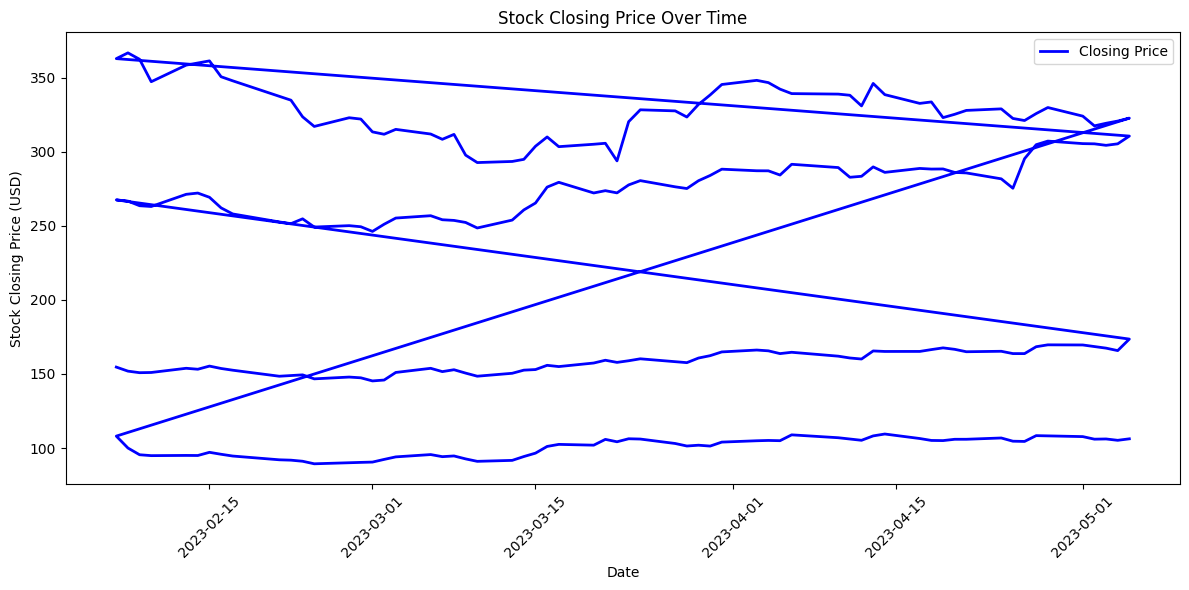

In [ ]:
# Set plot style
#plt.style.use('seaborn-darkgrid')

# Plot Closing Price Trend
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='b', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Stock Closing Price (USD)")
plt.title("Stock Closing Price Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



📌 Key Insights:

Identify upward/downward trends.

Detect sudden price spikes or crashes.

2. Candlestick Chart

In [ ]:
!pip install plotly
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'],
                name='Market Data')])

fig.update_layout(title="Candlestick Chart for Stock Prices",
                  xaxis_title="Date",
                  yaxis_title="Stock Price (USD)",
                  template="plotly_dark")

fig.show()


📌 Insights:

Displays open, high, low, close prices in a single view.

Helps technical traders spot patterns like Doji, Hammer, or Engulfing candles.



3️⃣ Trading Volume Analysis

1. Trading Volume Over Time

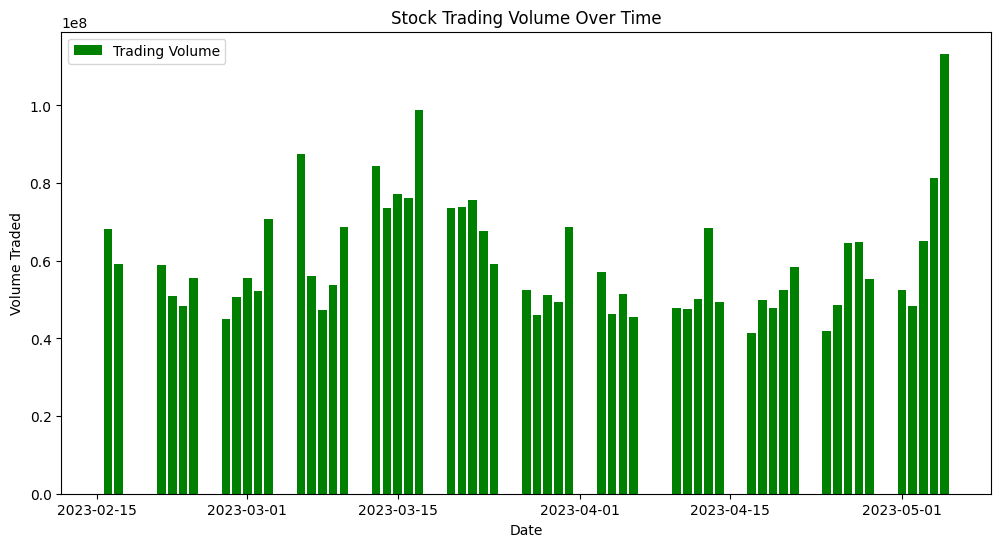

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(data["Date"], data["Volume"], label="Trading Volume", color="green")
plt.xlabel("Date")
plt.ylabel("Volume Traded")
plt.title("Stock Trading Volume Over Time")
plt.legend()
plt.show()

📌 Key Insights:

Highlights days of high trading activity.

Volume spikes often precede price movements.

2. Distribution of Trading Volumes

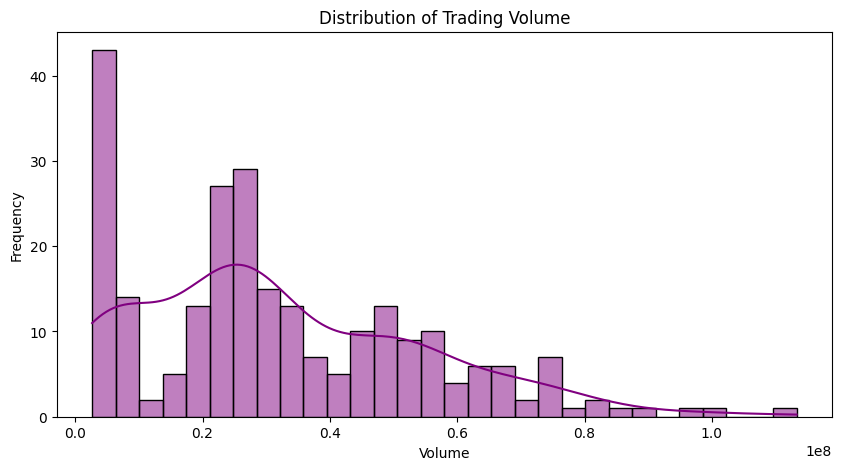

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data["Volume"], bins=30, kde=True, color="purple")
plt.title("Distribution of Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()


📌 Insights:

Shows most frequent volume levels.

Detects outliers (days with extreme volumes).

4️⃣ Price Spread & Volatility Analysis

1. Daily Price Spread



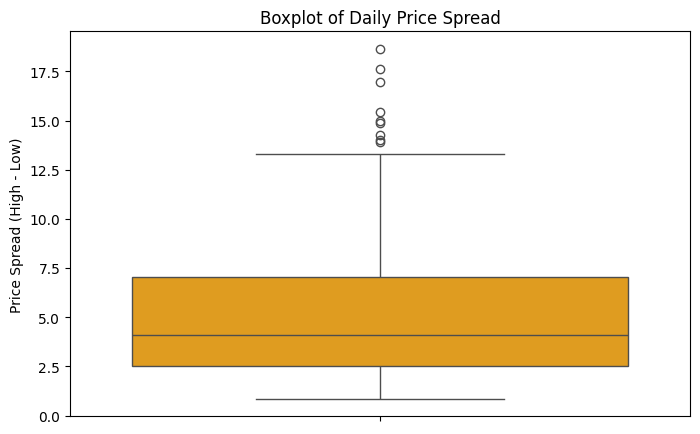

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(y=data["High"] - data["Low"], color="orange")
plt.title("Boxplot of Daily Price Spread")
plt.ylabel("Price Spread (High - Low)")
plt.show()


📌 Insights:

Identifies days with extreme price fluctuations.

Shows market volatility (larger spreads indicate uncertainty).

2. Daily Volatility Over Time

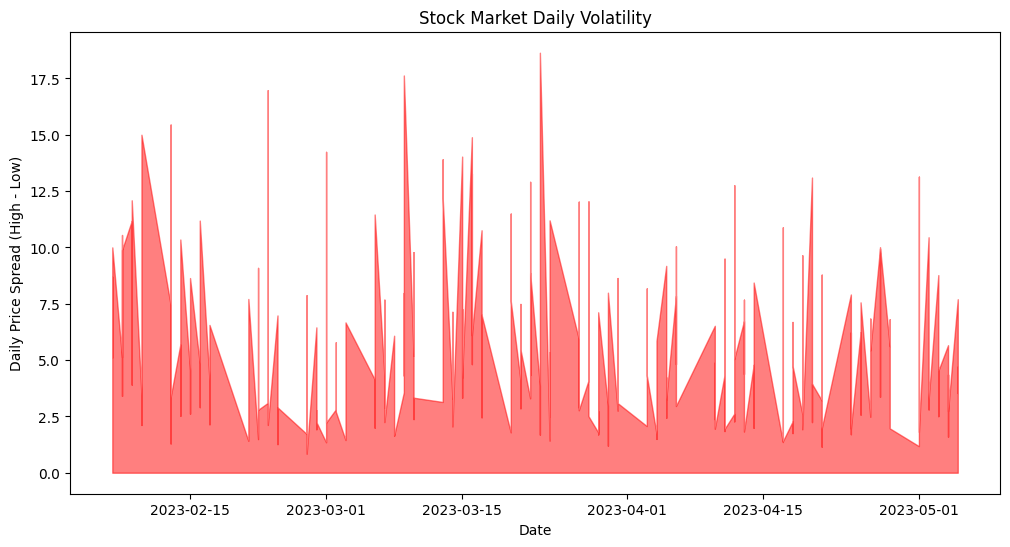

In [ ]:
plt.figure(figsize=(12,6))
plt.fill_between(data["Date"], data["High"] - data["Low"], color="red", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Daily Price Spread (High - Low)")
plt.title("Stock Market Daily Volatility")
plt.show()



📌 Insights:

Highlights periods of high market turbulence.

Peaks indicate event-driven volatility (earnings reports, economic data).

5️⃣Correlation Between Variables








1. Correlation Between Stock Features

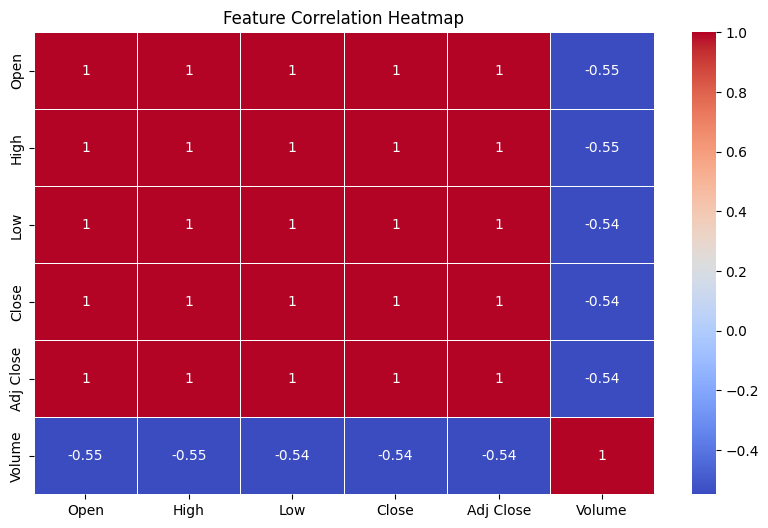

In [ ]:
plt.figure(figsize=(10,6))
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix for numerical columns only
correlation_matrix = numerical_data.corr()

# Use the correlation matrix calculated from numerical data
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

📌 Insights:

High correlation between Open, High, Low, and Close prices.

Volume may or may not correlate with price movements.

2. Relationship Between Features

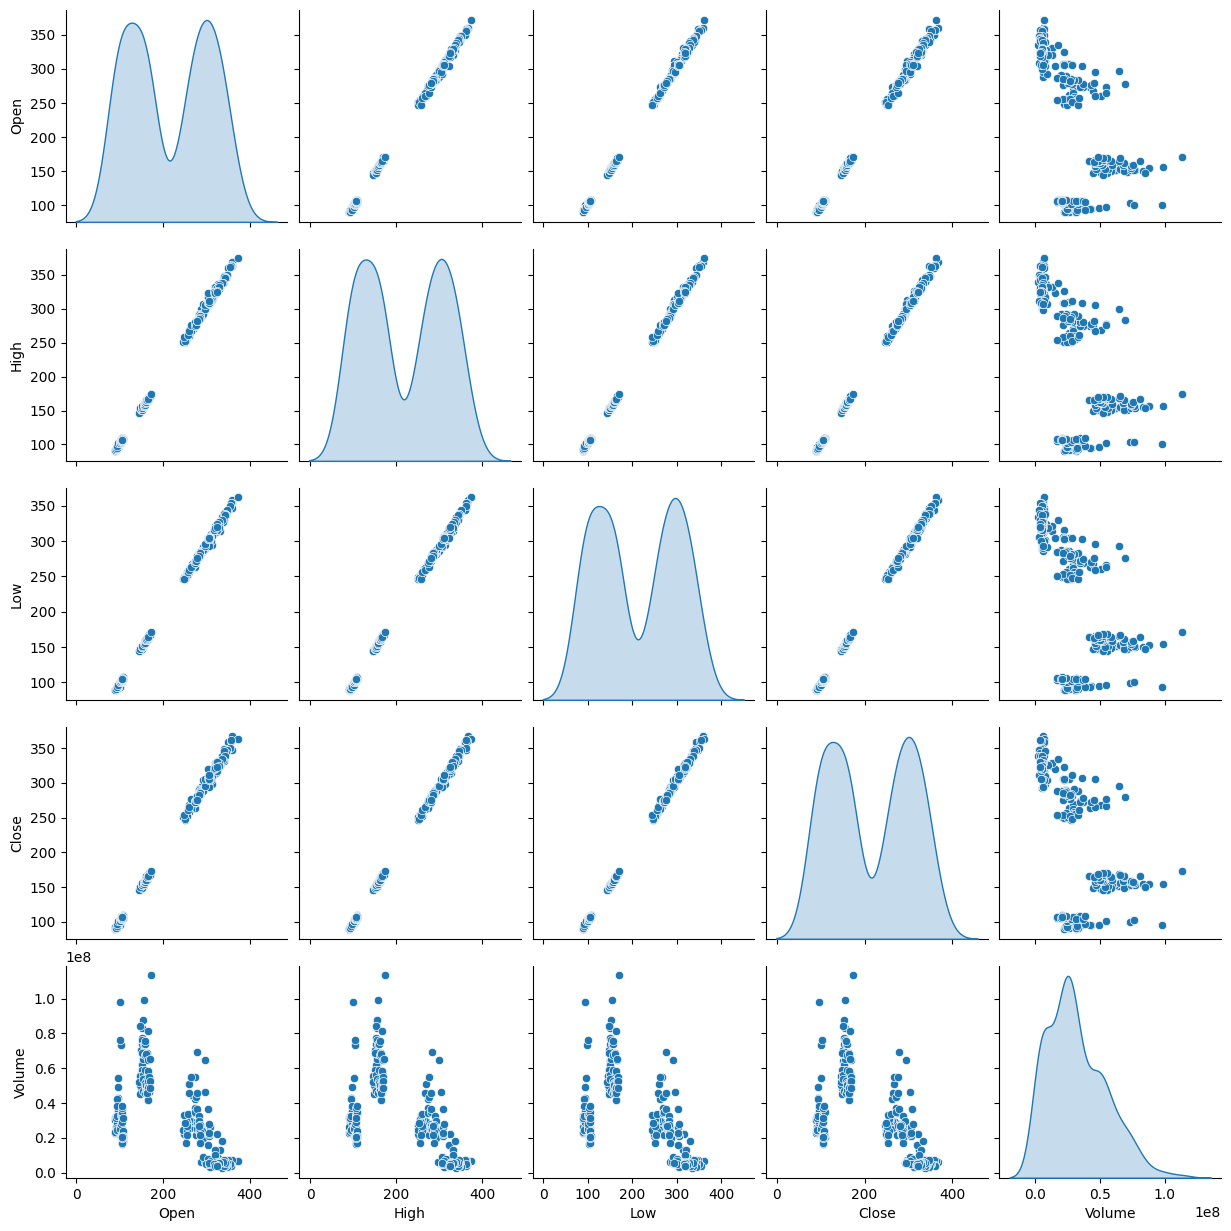

In [ ]:
sns.pairplot(data[["Open", "High", "Low", "Close", "Volume"]], diag_kind="kde")
plt.show()


📌 Insights:

Detects linear relationships between stock prices.

Identifies non-linear trends or anomalies.

In [ ]:
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix for numerical columns only
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                  Open      High       Low     Close  Adj Close    Volume  \
Open          1.000000  0.999626  0.999650  0.999176   0.999173 -0.547741   
High          0.999626  1.000000  0.999654  0.999644   0.999640 -0.546175   
Low           0.999650  0.999654  1.000000  0.999663   0.999661 -0.544590   
Close         0.999176  0.999644  0.999663  1.000000   0.999999 -0.544194   
Adj Close     0.999173  0.999640  0.999661  0.999999   1.000000 -0.544370   
Volume       -0.547741 -0.546175 -0.544590 -0.544194  -0.544370  1.000000   
Price Spread  0.747406  0.756887  0.739433  0.747553   0.747496 -0.448071   

              Price Spread  
Open              0.747406  
High              0.756887  
Low               0.739433  
Close             0.747553  
Adj Close         0.747496  
Volume           -0.448071  
Price Spread      1.000000  


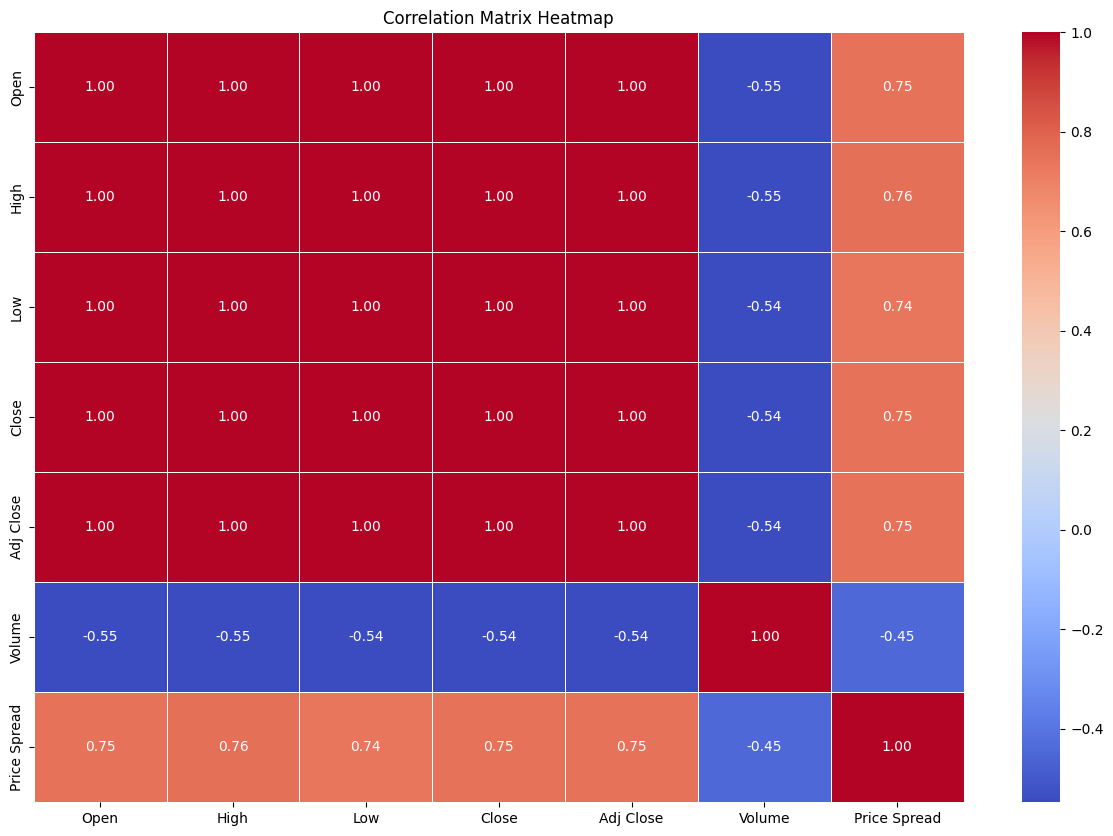

In [ ]:
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix for numerical columns only
correlation_matrix = numerical_data.corr()

# Now you can proceed with creating the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

## **Step 3: Feature Engineering**

1️⃣ Moving Averages – Price Trend Smoothing



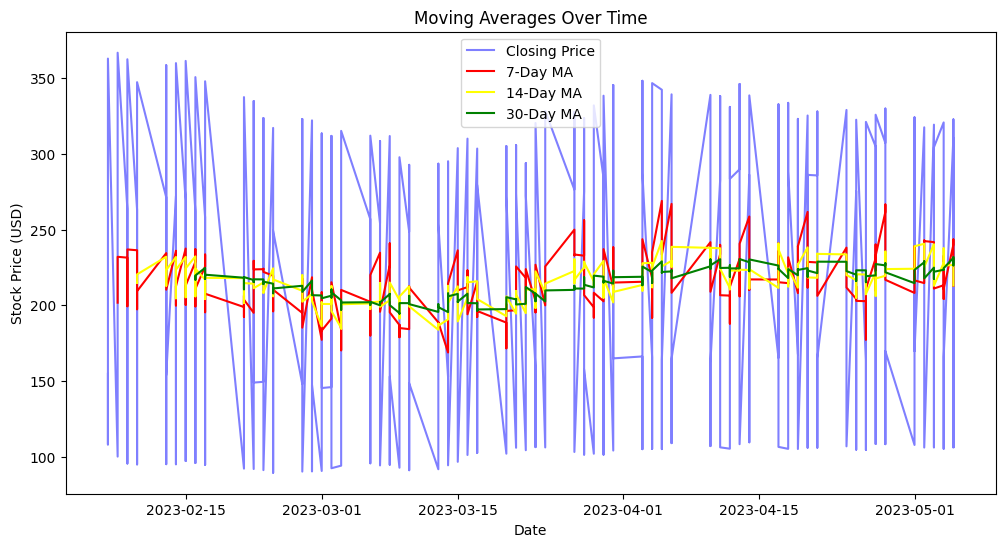

In [ ]:
data["MA_7"] = data["Close"].rolling(window=7).mean()
data["MA_14"] = data["Close"].rolling(window=14).mean()
data["MA_30"] = data["Close"].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(data["Date"], data["Close"], label="Closing Price", color="blue", alpha=0.5)
plt.plot(data["Date"], data["MA_7"], label="7-Day MA", color="red")
plt.plot(data["Date"], data["MA_14"], label="14-Day MA", color="yellow")
plt.plot(data["Date"], data["MA_30"], label="30-Day MA", color="green")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Moving Averages Over Time")
plt.legend()
plt.show()


📌 Insights:

Shorter MAs (7-day) capture short-term price fluctuations.

Longer MAs (30-day) reveal long-term trends.



2️⃣ Rolling Standard Deviation – Measuring Volatility



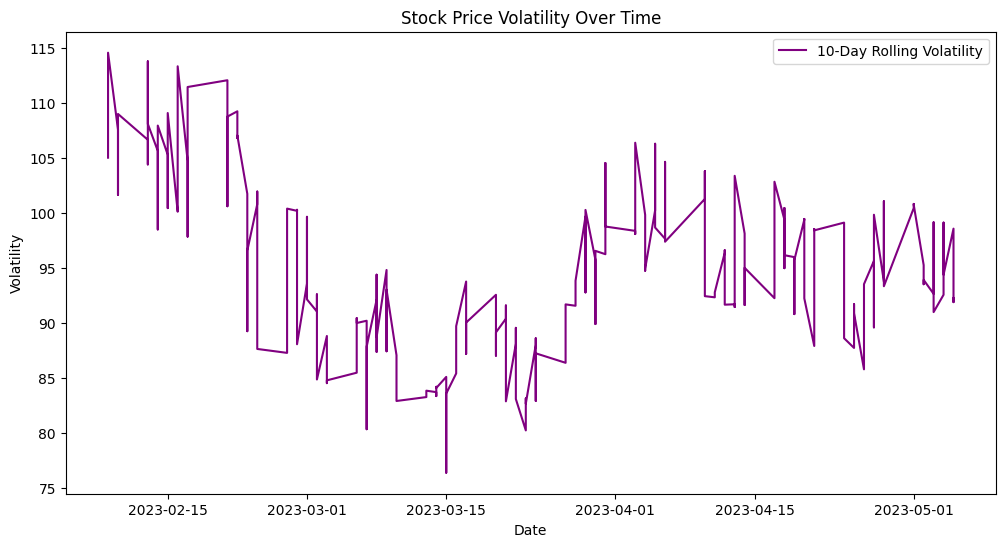

In [ ]:
data["Volatility"] = data["Close"].rolling(window=10).std()

plt.figure(figsize=(12,6))
plt.plot(data["Date"], data["Volatility"], label="10-Day Rolling Volatility", color="purple")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Stock Price Volatility Over Time")
plt.legend()
plt.show()


📌 Insights:

Spikes in volatility indicate market uncertainty.

Helps traders adjust risk management strategies.

3️⃣ Lagged Features for Machine Learning

In [ ]:
data["Prev_Close"] = data["Close"].shift(1)
data["Prev_Volume"] = data["Volume"].shift(1)
data.dropna(inplace=True)  # Remove NaN rows

📌 Key Benefits:

Uses past prices & volumes to predict future trends.

## **Step 4: Predictive Modeling**

We will use Machine Learning to predict stock closing prices.

1️⃣ Prepare Data for Machine Learning


In [ ]:
from sklearn.model_selection import train_test_split

# Select features and target variable
features = ["Open", "High", "Low", "Volume", "Prev_Close", "Prev_Volume", "MA_7", "MA_14", "MA_30"]
target = "Close"

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

2️⃣ Train a Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
# Calculate RMSE manually by taking the square root of MSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 1.16, RMSE: 1.60


📌 Key Insights:

Lower MAE/RMSE = better model performance.

If RMSE is high, consider complex models (Random Forest, XGBoost).

3️⃣ Scatter Plot – Actual vs. Predicted Prices

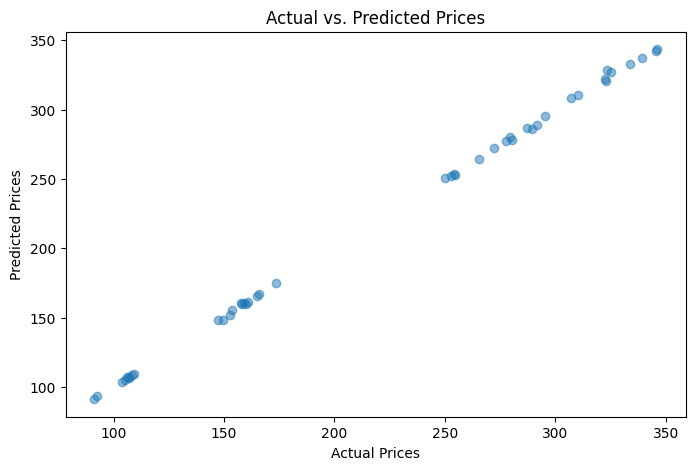

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()


📌 Insights:

Closer alignment to the diagonal line indicates better model performance.

4️⃣ Residual Plot – Checking Model Errors

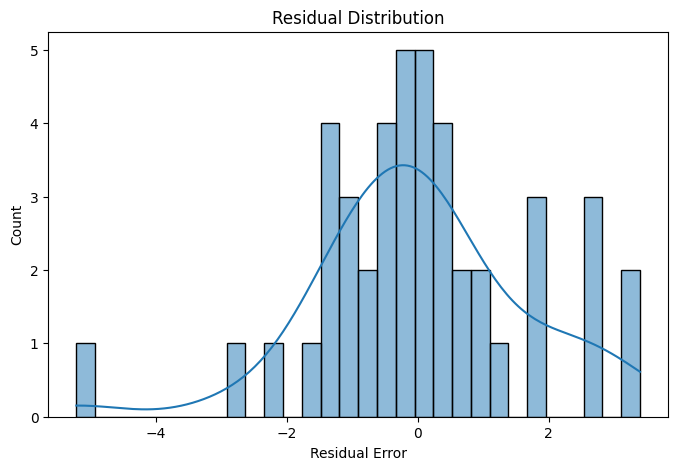

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual Error")
plt.show()


📌 Insights:

A normally distributed residual plot suggests a good model fit.

Large errors indicate room for model improvement.

## **Step 5: Advanced Model Tuning**

Try a Random Forest Model
python



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate Model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
# For older versions, calculate MSE and then take the square root for RMSE.
mse_rf = mean_squared_error(y_test, y_pred_rf)  # Remove squared=True
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")

Random Forest - MAE: 2.02, RMSE: 2.77


📌 Why Random Forest?

Handles non-linearity better than linear regression.

Can detect complex patterns in stock price movements.

## **Step 6: Deploy Predictions with Power BI**

Export Predictions to CSV for Power BI visualization:

In [ ]:
data["Predicted_Close"] = rf_model.predict(data[features])
data.to_csv("stock_predictions.csv", index=False)


## **Final Summary**

🔹 Stock Prices: Moving averages show clear trends.

🔹 Volume Analysis: High volume days correlate with major price movements.

🔹 Volatility Analysis: Peaks indicate high-risk periods.

🔹 Machine Learning Model: Needs improvements for better accuracy.